A imersão irá tratar sobre predição de valores de casas em São Paulo

### Aula 1


In [32]:
import pandas as pd

houses = pd.read_csv("https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv")
houses.head()


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [33]:
# desafio 1: Realizar a média da metragem para cada um dos bairros

houses.groupby('Bairro')['Metragem'].mean()

Bairro
Aclimação            253.056818
Alto da Boa Vista    418.875000
Alto da Lapa         294.337209
Alto da Mooca        270.050000
Alto de Pinheiros    433.444988
                        ...    
Vila Água Funda      152.200000
Água Branca          191.000000
Água Fria            165.416667
Água Funda           139.000000
Água Rasa            340.250000
Name: Metragem, Length: 701, dtype: float64

In [34]:
# desafio 2: Pegar outras estatísticas dos dados (como média, mediana, min, max)

houses['Metragem'].agg([pd.DataFrame.mean, pd.DataFrame.median, min, max])

mean         442.300659
median       290.000000
min           10.000000
max       750000.000000
Name: Metragem, dtype: float64

In [35]:
# desafio 3: Descobrir quais são os bairros que não tem nome de rua

null_streets = houses['Rua'].isna()
houses[null_streets]['Bairro'].unique()

array(['Jardim Morumbi', 'Jardim Luzitânia', 'Parque da Lapa',
       'Chácara Santo Antônio (Zona Sul)', 'Jardim Guedala',
       'Vila Arriete', 'Alto de Pinheiros', 'Planalto Paulista',
       'Vila Moinho Velho', 'Brooklin Paulista', 'Sumaré',
       'Jardim Paulista', 'Vila Gustavo', 'Jardim Trussardi',
       'Vila Madalena', 'Jardim dos Estados', 'Vila Santos',
       'Jardim Europa', 'Butantã', 'Jardim Paulistano',
       'Jardim Petrópolis', 'Vila Mariana', 'Vila Aparecida', 'Siciliano',
       'Alto da Lapa', 'Jardim da Glória', 'Morumbi', 'Vila Ida',
       'Cidade Jardim', 'Cidade Dutra', 'Água Fria', 'Parque Boturussu',
       'Belenzinho', 'Vila Sônia', 'Jardim Panorama', 'Jardim Ampliação',
       'Lauzane Paulista', 'Vila Sabrina', 'Vila Olímpia',
       'Jardim Franca', 'Jardim Sílvia (Zona Oeste)', 'Santo Amaro',
       'Mooca', 'Jardim América', 'Interlagos', 'Pacaembu',
       'Jardim Santo Amaro', 'Vila Matilde', 'Vila Prudente',
       'Vila Nova Conceição', 'Jard

### Aula 2


In [36]:
# iniciando alteração para a coluna valor para ser um float
splited_column = houses['Valor'].str.split(expand=True)


In [37]:
# existem diferentes tipos de imóveis, com venda e alugel
splited_column[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [38]:
# assim pegamos apenas os com venda 
houses = houses[splited_column[2].isnull()]
houses

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000


In [39]:
# removendo os pontos da string e convertendo para float
values_without_dots = houses['Valor'].str.split(expand=True)[1].str.replace('.', '')
houses["Valor"] = values_without_dots.astype(float)
houses.head()

/tmp/ipykernel_4401/3623410304.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  values_without_dots = houses['Valor'].str.split(expand=True)[1].str.replace('.', '')


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.0
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.0
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.0
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.0
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.0


In [40]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rua        6107 non-null   object 
 1   Bairro     9146 non-null   object 
 2   Cidade     9156 non-null   object 
 3   Metragem   9156 non-null   int64  
 4   Quartos    9156 non-null   int64  
 5   Banheiros  9156 non-null   int64  
 6   Vagas      9156 non-null   int64  
 7   Valor      9156 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 643.8+ KB


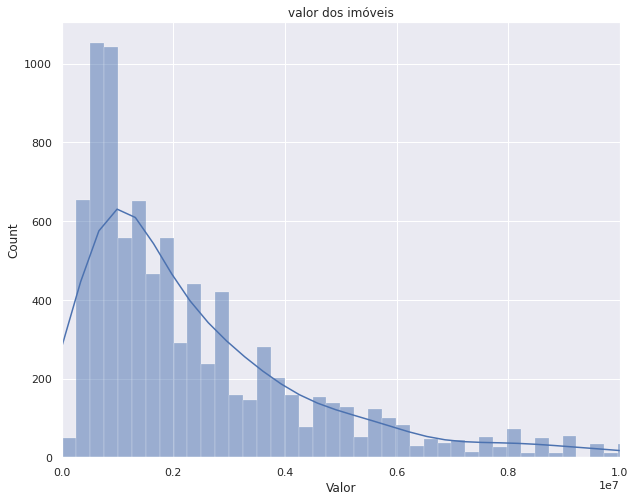

In [41]:
# plotando gráfico com seaborn e matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# setando as configurações padrões do seaborn
sns.set()

# aumentando o tamanho do gráfico
plt.figure(figsize=(10, 8))

# plotando o gráfico
ax = sns.histplot(data = houses, x = 'Valor', kde=True)

# adicionando um título
ax.set_title("valor dos imóveis")

# limitando a visualização do gráfico
plt.xlim(-50, 10000000)

# exibindo o gráfico
plt.show()


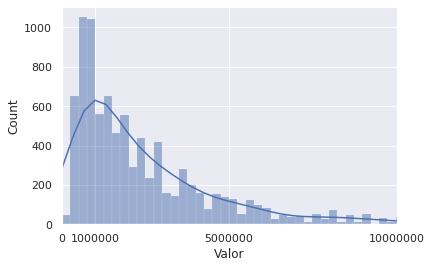

In [42]:
# desafio 1: Criar uma escala de valores em milhões.
ax = sns.histplot(data = houses, x = 'Valor', kde=True)
plt.xlim(-50, 10000000)
ax.set_xticks([0, 1000000, 5000000, 10000000], labels=['0', '1000000', '5000000', '10000000'])
plt.show()



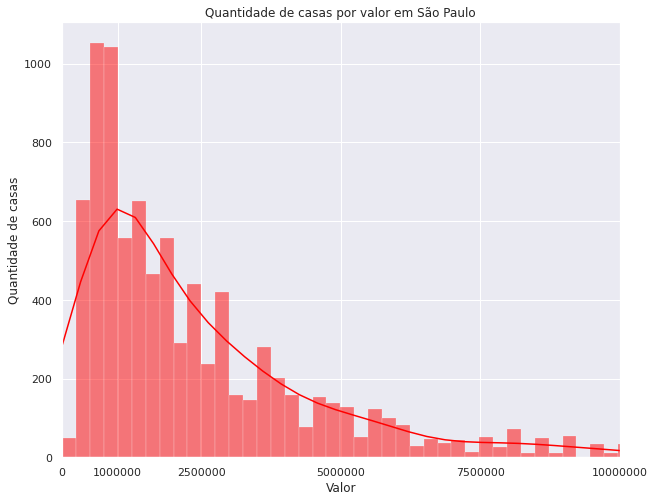

In [43]:
# desafio 2: Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala).
plt.figure(figsize=(10, 8))
ax = sns.histplot(data = houses, x = 'Valor', kde=True, color='red')
plt.xlim(-50, 10000000)

# título
ax.set_title('Quantidade de casas por valor em São Paulo')

# alterando os labels
ax.set_ylabel('Quantidade de casas')

# alterando a escala de X
ax.set_xticks(
    [0, 1000000, 2500000, 5000000, 7500000, 10000000], 
    labels=['0', '1000000', '2500000', '5000000', '7500000', '10000000']
)

plt.show()

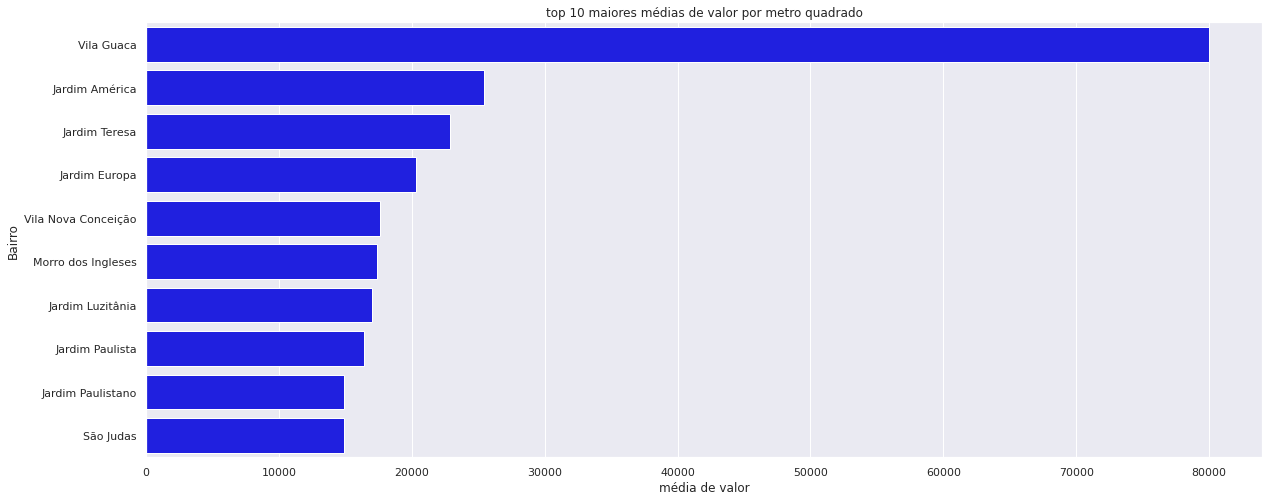

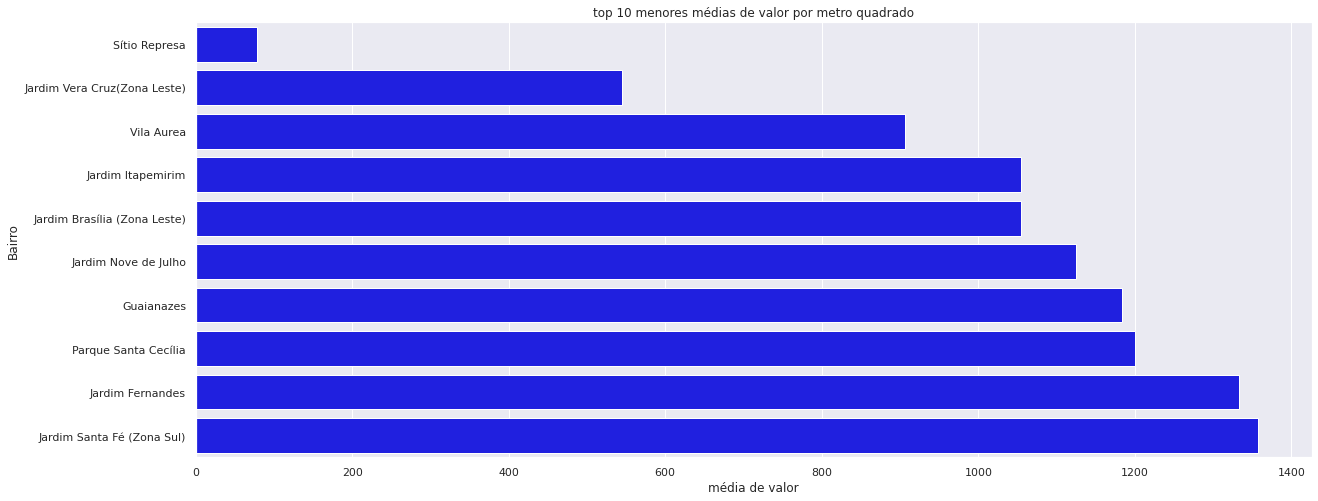

In [44]:
# desafio 3: Preço do metro quadrado por bairro e plotar em um gráfico ideal.

def calcular_valor_por_metro(df):
    media_metros = df['Metragem'].mean()
    media_preco = df['Valor'].mean()
    return media_preco/media_metros

preco_por_metro = houses.groupby('Bairro').apply(calcular_valor_por_metro)


# 10 maiores médias
plt.figure(figsize=(20, 8))
dez_maiores_medias = preco_por_metro.sort_values(ascending=False)[:10]
graph = sns.barplot(
    x = dez_maiores_medias.values, 
    y = dez_maiores_medias.index, 
    color='blue',
)
graph.set_title('top 10 maiores médias de valor por metro quadrado')
graph.set_xlabel('média de valor')

plt.show()

# 10 menores médias
plt.figure(figsize=(20, 8))
dez_menores_medias = preco_por_metro.sort_values(ascending=True)[:10]
graph = sns.barplot(x = dez_menores_medias.values, y = dez_menores_medias.index, color='blue')
graph.set_title('top 10 menores médias de valor por metro quadrado')
graph.set_xlabel('média de valor')

plt.show()


### Aula 4


In [45]:
url = "https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv"
dados_ibge = pd.read_csv(url, sep=';')
dados_ibge

,Cod_setor,Cod_Grandes Regi�es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,Unnamed: 33
0,355030801000001,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"2,32","2091,32","8532451,78","2164,55","8673276,78","1227,41","4285771,99","1713,75","5152087,86",NaN
1,355030801000002,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"2,09","1650,09","3983441,31","1717,44","4030519,99","1045,78","2572133,32","1468,08","2991546,94",NaN
2,355030801000003,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"3,08","1280,43","5474593,06","2349,53","7553913,02","902,97","2735492,52","1786,79","3837674,74",NaN
3,355030801000004,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"2,26","1119,59","3572955,1","1859,13","4567289,5","869,09","2122409,02","1567,41","2735383,24",NaN
4,355030801000005,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"2,35","1416,9","2240207,58","1581,66","2240109,39","917,71","1570047,75","1356,35","1725877,85",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18358,355030896000243,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"2,61","772,09","168751,1","814,52","143188,21","467,46","191332,48","699,95","123399,08",NaN
18359,355030896000244,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"2,49","692,5","239941,27","812,93","182516,2","439,33","194034,99","702,1","124952,38",NaN
18360,355030896000245,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"2,54","630,06","329705,22","843,31","260395,9","347,6","228162,66","767,5","181129,99",NaN
18361,355030896000246,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"4,21","597,37",349101,908,"244391,67","397,76","436942,16","854,2","550319,43",NaN


In [46]:
dados_ibge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cod_setor            18363 non-null  int64  
 1   Cod_Grandes Regi�es  18363 non-null  int64  
 2   Nome_Grande_Regiao   18363 non-null  object 
 3   Cod_UF               18363 non-null  int64  
 4   Nome_da_UF           18363 non-null  object 
 5   Cod_meso             18363 non-null  int64  
 6   Nome_da_meso         18363 non-null  object 
 7   Cod_micro            18363 non-null  int64  
 8   Nome_da_micro        18363 non-null  object 
 9   Cod_RM               18363 non-null  int64  
 10  Nome_da_RM           18363 non-null  object 
 11  Cod_municipio        18363 non-null  int64  
 12  Nome_do_municipio    18363 non-null  object 
 13  Cod_distrito         18363 non-null  int64  
 14  Nome_do_distrito     18363 non-null  object 
 15  Cod_subdistrito      18363 non-null 

Foi realizado um processo de `merge` entre as tabelas, utilizando outros dados como geolocalização para fazer isso, para termos um única tabela com todos os dados. O processo realizado é semelhante ao descrito [neste artigo](https://medium.com/creditas-tech/incrementando-dados-geogr%C3%A1ficos-com-o-censo-nacional-do-ibge-54d342c4bdcf)

Este é outro artigo interessante que aborda a geolocalização e a plotagem de gráficos no pandas:
https://medium.com/creditas-tech/dados-georreferenciados-explora%C3%A7%C3%A3o-e-visualiza%C3%A7%C3%A3o-com-python-edd51e7c53da

In [47]:
# após realizar os merges, foi obtido o seguinte DataFrame:
dados_vendas_censo = pd.read_csv('./dataframes/dados_vendas_censo.csv')
dados_vendas_censo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5605 entries, 0 to 5604
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rua                    5605 non-null   object 
 1   Bairro                 5597 non-null   object 
 2   Cidade                 5605 non-null   object 
 3   Metragem               5605 non-null   int64  
 4   Quartos                5605 non-null   int64  
 5   Banheiros              5605 non-null   int64  
 6   Vagas                  5605 non-null   int64  
 7   Valor                  5605 non-null   object 
 8   Valor_anuncio          5605 non-null   float64
 9   Tipo_anuncio           0 non-null      float64
 10  Valor_mm               5605 non-null   float64
 11  Valor_m2               5605 non-null   float64
 12  rua                    5605 non-null   object 
 13  cep                    5605 non-null   float64
 14  latitude               5605 non-null   float64
 15  long

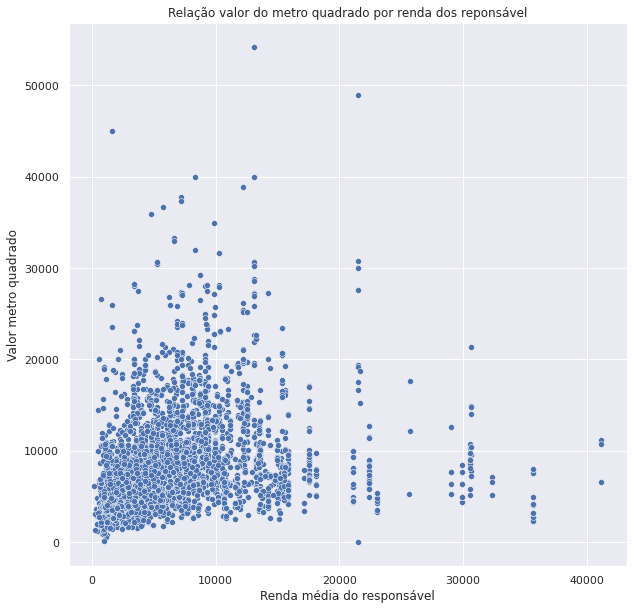

In [48]:
# analisando a quantidade de m2 em relação a renda dos entrevistados
plt.figure(figsize = (10, 10))
graph = sns.scatterplot(data=dados_vendas_censo, x='V005', y='Valor_m2')
graph.set_title("Relação valor do metro quadrado por renda dos reponsável")
graph.set_ylabel("Valor metro quadrado")
graph.set_xlabel("Renda média do responsável")
plt.show()

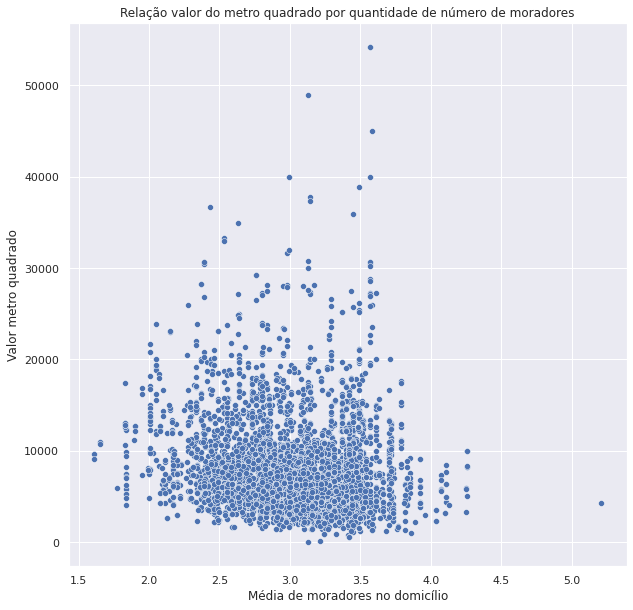

In [49]:
# analisando a quantidade de m2 em relação a quantidade de moradores das residências
plt.figure(figsize = (10, 10))
graph = sns.scatterplot(data=dados_vendas_censo, x='V003', y='Valor_m2')
graph.set_title("Relação valor do metro quadrado por quantidade de número de moradores")
graph.set_ylabel("Valor metro quadrado")
graph.set_xlabel("Média de moradores no domicílio")
plt.show()

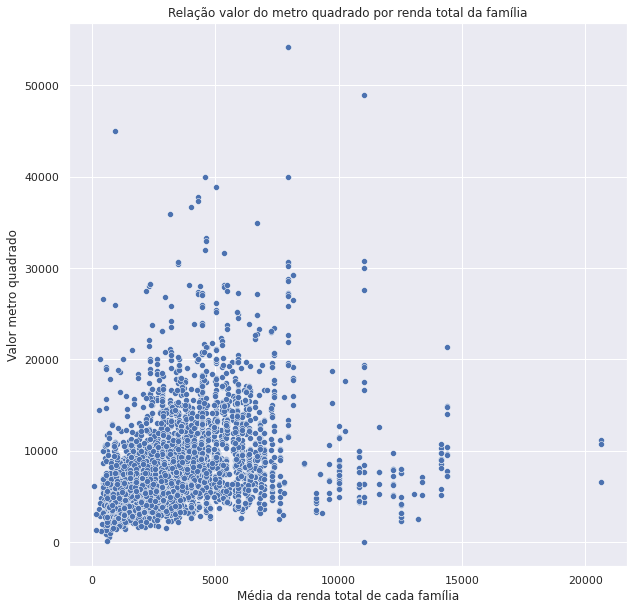

In [50]:
# analisando a quantidade de m2 em relação a renda total da família
plt.figure(figsize = (10, 10))
graph = sns.scatterplot(data=dados_vendas_censo, x='V009', y='Valor_m2')
graph.set_title("Relação valor do metro quadrado por renda total da família")
graph.set_ylabel("Valor metro quadrado")
graph.set_xlabel("Média da renda total de cada família")
plt.show()

### Aula 5

In [51]:
# removendo algumas colunas desnecessárias da tabela
dados_vendas_censo = dados_vendas_censo[['Rua', 'Bairro', 'Cidade', 'Metragem', 'Quartos', 'Banheiros', 'Vagas',
       'Valor_anuncio', 'Valor_mm', 'Valor_m2', 'latitude', 'longitude', 'Situacao_setor', 'V001',
       'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010',
       'V011', 'V012']].dropna()
dados_vendas_censo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.0,7.000,7000.000000,...,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.0,3.700,7459.677419,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.0,0.380,3040.000000,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.0,0.540,5400.000000,...,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.0,1.980,4500.000000,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5599,Rua Pedro Teixeira,Vila Olímpia,São Paulo,157,3,2,2,960000.0,0.960,6114.649682,...,2.17,1.27,5054.58,33245189.73,5231.93,33485189.78,3649.06,26562232.53,4551.66,29032823.35
5600,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.0,1.500,5617.977528,...,2.81,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85
5601,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000.0,0.665,7000.000000,...,2.99,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57
5603,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000.0,1.050,5121.951220,...,2.75,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33


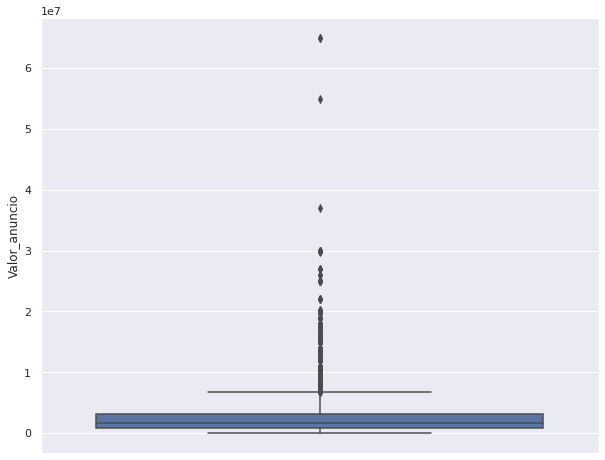

In [52]:
# verificando como esta a distribuição dos valores de venda
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas_censo, y="Valor_anuncio")
plt.show()

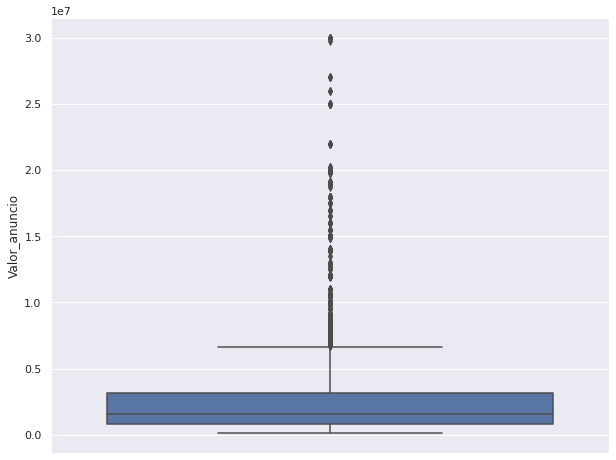

In [53]:
# como tem outliers acima de 30000000 e abaixo de 10000 e estão em pequena quantidade, podemos removê-los da 
# seguinte maneira:
dados_vendas_censo.drop(dados_vendas_censo.query("Valor_anuncio > 30000000 | Valor_anuncio < 100000").index, inplace = True)
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas_censo, y="Valor_anuncio")
plt.show()

In [54]:
# verificando a correlação entre os dados da tabela
dados_vendas_censo.corr()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,latitude,longitude,Situacao_setor,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
Metragem,1.000000,0.232276,0.234934,0.274053,0.303592,0.303592,0.056089,-0.086163,-0.128923,0.482483,...,0.126527,0.049062,0.224889,0.065875,0.225569,0.049841,0.204488,0.072230,0.208632,0.051737
Quartos,0.232276,1.000000,0.547296,0.417825,0.369636,0.369636,0.121157,-0.013228,-0.186287,-0.007003,...,0.156817,0.071148,0.319978,0.121673,0.332415,0.111638,0.310049,0.125277,0.323354,0.108830
Banheiros,0.234934,0.547296,1.000000,0.456339,0.469255,0.469255,0.220071,-0.034627,-0.248512,-0.025705,...,0.208197,0.070469,0.407611,0.110595,0.410926,0.084933,0.389566,0.114956,0.397168,0.084741
Vagas,0.274053,0.417825,0.456339,1.000000,0.475316,0.475316,0.149995,-0.037659,-0.185703,-0.012324,...,0.235325,0.085575,0.344286,0.106198,0.344335,0.078380,0.318941,0.121635,0.330401,0.088030
Valor_anuncio,0.303592,0.369636,0.469255,0.475316,1.000000,1.000000,0.703748,0.015516,-0.209943,-0.003601,...,0.127991,0.080879,0.449633,0.107548,0.445503,0.072232,0.470024,0.130210,0.448162,0.083339
Valor_mm,0.303592,0.369636,0.469255,0.475316,1.000000,1.000000,0.703748,0.015516,-0.209943,-0.003601,...,0.127991,0.080879,0.449633,0.107548,0.445503,0.072232,0.470024,0.130210,0.448162,0.083339
Valor_m2,0.056089,0.121157,0.220071,0.149995,0.703748,0.703748,1.000000,0.051428,-0.181037,-0.031364,...,-0.126565,0.009049,0.290189,0.042410,0.279019,0.018836,0.366010,0.052527,0.315668,0.021929
latitude,-0.086163,-0.013228,-0.034627,-0.037659,0.015516,0.015516,0.051428,1.000000,0.150834,-0.027703,...,-0.054556,0.027244,-0.048720,-0.089611,-0.065256,-0.069906,-0.038548,-0.071035,-0.065946,-0.058243
longitude,-0.128923,-0.186287,-0.248512,-0.185703,-0.209943,-0.209943,-0.181037,0.150834,1.000000,-0.009047,...,-0.045846,0.022275,-0.359216,-0.096183,-0.358897,-0.073212,-0.377897,-0.103893,-0.368728,-0.074432
Situacao_setor,0.482483,-0.007003,-0.025705,-0.012324,-0.003601,-0.003601,-0.031364,-0.027703,-0.009047,1.000000,...,0.025595,0.002048,-0.028839,-0.007060,-0.029478,-0.005075,-0.035241,-0.007349,-0.032637,-0.004958


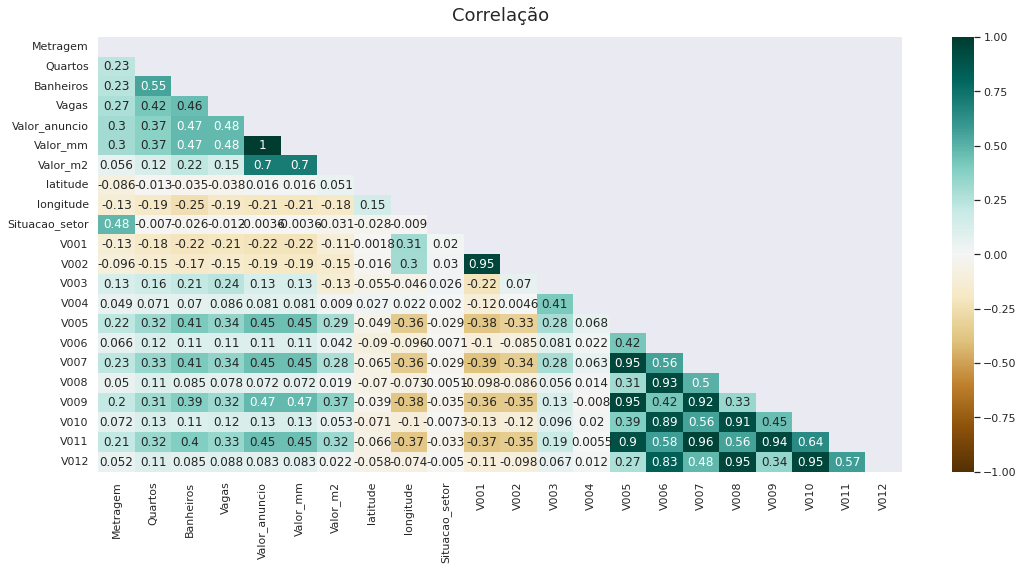

In [56]:
import numpy as np

# utilizando o seaborn para melhor plotar o gráfico de correlações
plt.figure(figsize=(18, 8))
#https://www.tylervigen.com/spurious-correlations
mask = np.triu(np.ones_like(dados_vendas_censo.corr(), dtype=bool))
heatmap = sns.heatmap(dados_vendas_censo.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação', fontdict={'fontsize':18}, pad=16);

In [58]:
# criando um modelo com Regressão Linear e a maior parte das colunas disponíveis:

# obs: o valor do metro quadrado não entra pq é uma variável que pode vazar dados para o modelo, já que o valor
# do imóvel é utilizado para calcular esse do metro quadrado

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = dados_vendas_censo[['Metragem', 'Quartos', 'Banheiros', 'Vagas',
    'V001','V002','V003','V004','V005','V006','V007','V008','V009', 'V010','V011','V012',]]
Y = dados_vendas_censo["Valor_anuncio"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)
lr = LinearRegression()

lr.fit(X_train, Y_train)


LinearRegression()

In [61]:
# testando o modelo da regressão linear
from sklearn.metrics import mean_absolute_error, r2_score

Y_predict = lr.predict(X_test)
mae = mean_absolute_error(Y_test, Y_predict)
r2 = r2_score(Y_test, Y_predict)

print('mae', mae)
print('r2', r2)

mae 1336764.143608505
r2 0.38849083493777203


In [74]:
# criando uma função genérica para treinar com diferentes modelos e configurações

def test_with_generic_model(features, test_size, model_class, model_options = {}):
    X = dados_vendas_censo[features]
    Y = dados_vendas_censo["Valor_anuncio"]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = 42)
    model = model_class(**model_options)
    model.fit(X_train, Y_train)
    check_model_efficiency(model, X_test, Y_test)
    

def check_model_efficiency(model, X_test, Y_test):
    Y_predict = model.predict(X_test)
    mae = mean_absolute_error(Y_test, Y_predict)
    r2 = r2_score(Y_test, Y_predict)

    print('mae', mae)
    print('r2', r2)
    

In [86]:
# teste apenas com as variáveis iniciais
features = ['Metragem', 'Quartos', 'Banheiros', 'Vagas']
test_with_generic_model(features, 0.25, LinearRegression)

mae 1489048.2716189802
r2 0.3107917803154906


In [92]:
# teste com o modelo de árvore de decisão e o critério squared_error
from sklearn.tree import DecisionTreeRegressor

features = ['Metragem', 'Quartos', 'Banheiros', 'Vagas',
    'V001','V002','V003','V004','V005','V006','V007','V008','V009', 'V010','V011','V012',]
test_with_generic_model(features, 0.25, DecisionTreeRegressor, {'random_state': 1})

mae 685083.1920563098
r2 0.6943843009663001


In [95]:
# teste com o modelo de árvore de decisão e o critério friedman_mse
from sklearn.tree import DecisionTreeRegressor

features = ['Metragem', 'Quartos', 'Banheiros', 'Vagas',
    'V001','V002','V003','V004','V005','V006','V007','V008','V009', 'V010','V011','V012',]
test_with_generic_model(features, 0.25, DecisionTreeRegressor, {'random_state': 1, 'criterion': 'friedman_mse'})

mae 708285.3496732027
r2 0.6381558502572029


In [101]:
# teste com o modelo de árvore de decisão e o critério absolute_error
from sklearn.tree import DecisionTreeRegressor

features = ['Metragem', 'Quartos', 'Banheiros', 'Vagas',
    'V001','V002','V003','V004','V005','V006','V007','V008','V009', 'V010','V011','V012',]
test_with_generic_model(features, 0.25, DecisionTreeRegressor, {'random_state': 10, 'criterion': 'absolute_error'})

mae 728488.1425339367
r2 0.6820225300585889


In [105]:
# teste com o modelo de árvore de decisão e o critério poisson
from sklearn.tree import DecisionTreeRegressor

features = ['Metragem', 'Quartos', 'Banheiros', 'Vagas',
    'V001','V002','V003','V004','V005','V006','V007','V008','V009', 'V010','V011','V012',]
test_with_generic_model(features, 0.25, DecisionTreeRegressor, {'random_state': 10, 'criterion': 'poisson'})

mae 711664.5125691303
r2 0.6806602693911881


In [106]:
# teste com o modelo de Ridge Regression
from sklearn import linear_model

features = ['Metragem', 'Quartos', 'Banheiros', 'Vagas',
    'V001','V002','V003','V004','V005','V006','V007','V008','V009', 'V010','V011','V012',]
test_with_generic_model(features, 0.25, linear_model.Ridge)

mae 1336809.2049340084
r2 0.38843314777919324


/home/jacksonalves/Documentos/github/ML/jupyter-venv/lib64/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.94354e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Até o momento, o melhor modelo foi o de Arvore de Decisão com o critério de squared_error